# Overview

Logistic regression seeks to : 
- **model** the probability of an event occuring depending on the values of the independent variables, which can be categorical or numerical;

- **estimate** the probability that an event occurs for a randomly selected observation versus the probability that the event does not occur;
- **predict** the effect of a series of variables on a binary response variable;
- **classify** observations by estimating the probability that an observation is in a particular category (such as manual or automatic in our problem)

Why don't we use Linear Regression instead?
1. Binary data does not have a normal distribution, which is a condition needed for most other types of regression
- Predicted values of the dependent variable can be beyond 0 and 1 which violates the definition of probability
- Probabilities are often not linear such as “U” shapes where probability is very low or very high at the extremes of x-values .

Some background so that you can understand the importance of odds ratio in logistic regression. 

- **Probabilities**: $\dfrac{outcomes of interest}{all possible outcomes}$
- **Odds**: $\dfrac{P(Occuring)}{P(Not Occuring)} \rightarrow \dfrac{P(Occuring)}{1 - P(Occuring)}$

- **Odds Ratio**: Ratio of two odds $\rightarrow \dfrac{\dfrac{P(\text{Occuring 1})}{1 - P(\text{Occuring 1} )}}{\dfrac{P(\text{Occuring 2})}{1 - P(\text{Occuring 2})}}$

**Odds Ratio Example**

Assume we have two coins, one fair(probability of 0.5 for both sides) and one weighted (probability of 0.7 for
heads and 0.3 for tails). What are the odds of getting “heads” on the weighted coin?


In [2]:
import matplotlib.pyplot as plt
import numpy as np

p_f_h = 0.5
p_f_t = 0.5
p_w_h = 0.7
p_w_t = 0.3
odds_f_h = p_f_h/(1-p_f_h)
odds_w_h = p_w_h/(1-p_w_h)
odds_ratio = odds_w_h/odds_f_h
print(odds_ratio)

2.333333333333333


This means that the odds of getting heads on the weighted coin are 2.33 greater than the fair coin.

** The odds ratio in Logistic Regression** 

- The odds ratio for a variable in logistic regression represents how the odds change with a 1 unit increase
in that variable holding all other variables constant
- For example :
    - Body weight and diabetes (two categories: positive or negative)
    - Weight variable had an odds ratio of 1.1
    - This means a pound increase in weight increases diabetes by 1.1 (not very high b/c we are looking at 1lb increments)
    - A ten pound increase in weight, increases the odds to 1.1 10 .
    - This holds true at any point in the weight spectrum.
    - It is important not to confuse the odds with probability.
    
**Bernoulli Distribution**

The dependent variable in logistic regression follows the Bernoulli distribution having and unknown probability $p$.

- Remember that Bernoulli is only a special case of Binomial distribution where $n = 1$ (one experiment is conducted)
- Sucess is 1 and failure is 0;
- The probability of sucess is p and failure $q = 1 - p$;
- In logistic regression we are estimating an unknown p for any given linear combination of independent variables;
- The link between the independent variables and the Bernoulli distribution is called the logit.

**Logit**
- In logistic regression we don’t know p like we do in Binomial distribution problems. The goal of logistic regression is to estimate p for a linear combination of independent variables.
- The natural log of the odds ratio , the logit, results in any value onto the Bernoulli probability distribution between 0 and 1.
- $logit(p) = ln(\dfrac{p}{1-p})$ **OR** $logit(p) = ln(p) - ln(1-p)$
- In the logit function, the argument takes values between 0 to 1 but we want the function to take those values. Therefore we will take the inverse of the logit function. $logit^{-1} (a) = \dfrac{1}{1 + e^{-a}} = \dfrac{e^{a}}{1 + e^{a}}$ where a is some number and e is Eulier’s number.
    - In our case, $a$ will be the linear combination of variables and their coefficients. The inverse-logit will return the probability of being a “1” or in the “evenr occurs” group

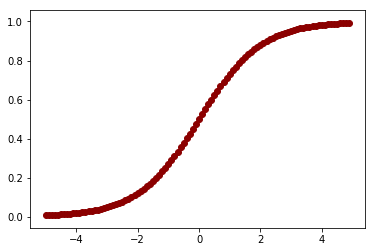

In [7]:
def y(a):
    return(1/(1 + np.exp(-a)))
x =  np.arange(-5, 5, 0.1)
z = y(x)
plt.scatter(x, z, c = 'darkred')
plt.show()


**Estimated Regression Equation**

The natural algorithm of the odds ratio is equivalent to a linear function of the independent variables.

$logit(p) = ln(\dfrac{p}{1−p}) = \beta_{0} + \beta_{1} \chi_{1}$

The antilog of the logit function allows us to find the estimation regression equation.
$$\dfrac{p}{1−p} = e^{\beta_{0} +\beta_{1}\chi_{1}}$$
$$p = e^{\beta_{0} +\beta_{1}\chi_{1}}(1 − p)$$
$$p =e^{\beta_{0} +\beta_{1}\chi_{1}} − e^{\beta_{0} +\beta_{1}\chi_{1}} p$$
$$p(1 + e^{\beta_{0} +\beta_{1}\chi_{1}}) = e^{\beta_{0} +\beta_{1}\chi_{1}}$$
$$p = \dfrac{e^{\beta_{0} +\beta_{1}\chi_{1}}}{1+e^{\beta_{0} +\beta_{1}\chi_{1}}}$$
Estimated Regression Equation : 
$$\hat{p} = \dfrac{e^{\beta_{0} +\beta_{1}\chi_{1}}}{1+e^{\beta_{0} +\beta_{1}\chi_{1}}}$$

**Parameter Estimation**

We use the maximum likelihood to estimate the parameters. 

$$l(\beta_{0}, \beta_{1}) = \prod_{i, y_{i} = 1}p(x_{i})\prod_{i, y_{i} = 0}(1 - p(x_{i}))$$

This likelihood gives the probability of the observed zeros and
ones in the data. We pick $β_{0}$ and $β_{1}$ to maximize the likelihood of the observed data.

In [5]:
from sklearn import datasets 
import statsmodels.formula.api as sm
import pandas as pd
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

data = pd.read_table("SAheart.data.txt", sep = ",")
X = data.iloc[:,[2,3, 4,6, 7, 8,9]]
Y = data["chd"]

model = sm.Logit(Y, X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.558711
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      455
Method:                           MLE   Df Model:                            6
Date:                Tue, 06 Mar 2018   Pseudo R-squ.:                  0.1340
Time:                        21:06:46   Log-Likelihood:                -258.12
converged:                       True   LL-Null:                       -298.05
                                        LLR p-value:                 3.820e-15
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
tobacco        0.0828      0.026      3.140      0.002       0.031       0.134
ldl            0.1759      0.058      3.024      0.002       0.062       0.290
adiposity      0.0689      0.026      2.611      0.009       0.017       0.121
typea          0.0075      0.010      0.777      0.437      -0.011       0.026
obesity       -0.1972      0.036     -5.466      0.000      -0.268      -0.126
alcohol        0.0001      0.004      0.031      0.975      -0.008       0.009
age            0.0264      0.010      2.768      0.006       0.008       0.045
==============================================================================
"""

This summary shows an overview of the model such as the dependent variable, the method used to estimate the parameters (MLE).

However, it gets into much more detail. 

The first important information is the display of coefficients. Then, Z scores are also quite important because it indicates whether the independent variable is significant for the determination of dependent variable. It is calculated as the coefficients divided by their standard errors. 

Each of these correspond formally to a test of the null hypothesis that the coefficient in question is zero, while all the others are not (also known as the Wald test). A Z score greater than approximately 2 in absolute value is significant at the 5% level.


In [6]:
coefficients = result.params
coefficients

tobacco      0.082756
ldl          0.175936
adiposity    0.068930
typea        0.007503
obesity     -0.197171
alcohol      0.000136
age          0.026436
dtype: float64